In [31]:
# 1) Setup the data
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [33]:
from sklearn.datasets import load_boston

In [34]:
boston = load_boston()

In [35]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

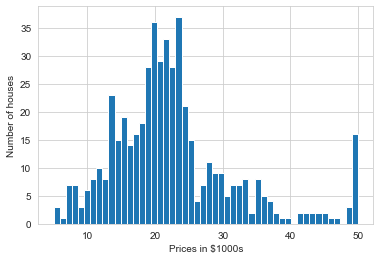

In [36]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

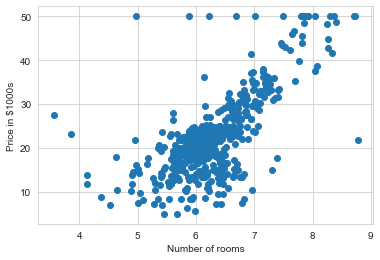

In [37]:
plt.scatter(boston.data[:,5],boston.target) # column 5 of the data set array: RM

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')
# larger number of rooms = larger house size = larger prize
# therefore we see a correlation between the number of rooms and the price of the house

In [38]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
boston_df['Price'] = boston.target

In [40]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


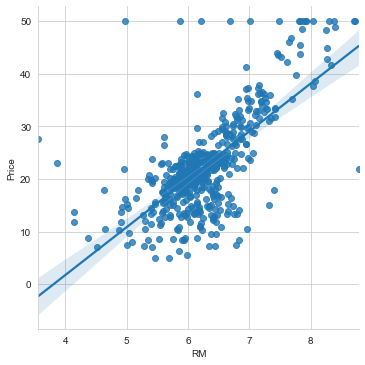

In [41]:
# Liner Regression with Seaborn
sns.lmplot(x='RM',y='Price',data=boston_df)


## Step 3: The mathematics behind the Least Squares Method.¶
In this particular lecture we'll use the least squares method as the way to estimate the coefficients. Here's a quick breakdown of how this method works mathematically:

Take a quick look at the plot we created above using seaborn. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

In [42]:
# Mathematics behind the Least Squares Method. tutorial: https://www.youtube.com/watch?v=Qa2APhWjQPc

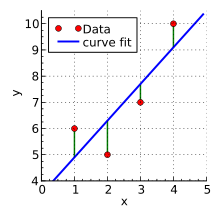

In [43]:
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)


## Step 4: Using Numpy for a Univariate Linear Regression

Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [44]:
# Liner regression with Pandas (all calculations)
X = boston_df.RM # values
X.shape

(506,)

In [45]:
# v makes X two-dimensional
X = np.vstack(boston_df.RM) # attributes

In [46]:
X.shape # (values, attributes)

(506, 1)

In [47]:
Y = boston_df.Price # Setup Y

In [48]:
X
# X = X.dtype('float64')

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [49]:
# [X 1]
X = np.array( [ [value, float(1)] for value in X], dtype='float64' )
# X = np.vstack([X, np.ones(len(X))]).T

In [50]:
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [51]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
# Least Square Method solution (R^2). tutorial: https://www.youtube.com/watch?v=Qa2APhWjQPc (same one from the beggining of Step 3)

m, b = np.linalg.lstsq(X,Y,rcond=None)[0] # creating m and b variables for the formula

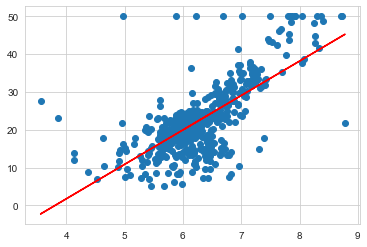

In [52]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x = boston_df.RM

plt.plot(x, m*x + b,'r',label='Best Fit Line')


## Step 5: Getting the error

Great! We've just completed a single variable regression using the least squares method with Python! Let's see if we can find the error in our fitted line. Checking out the documentation here, we see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. This was the summed D^2 value we discussed earlier.

It's probably easier to understand the root mean squared error, which is similar to the standard deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root. There is also an issue of bias and an unbiased regression, but we'll delve into those topics later.

For now let's see how we can get the root mean squared error of the line we just fitted.

In [53]:
result = np.linalg.lstsq(X,Y,rcond=None)

error_total = result[1]

rmse = np.sqrt(error_total / len(X))

print("The room mean square error was %.2f" %rmse)

# 68,95,99.7 rule tutorial: https://www.youtube.com/watch?v=mtbJbDwqWLE&ab_channel=SimpleLearningPro

The room mean square error was 6.60


## Step 6: Using scikit learn to implement a multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the linear regression library from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [54]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [55]:
# R-Square (Cofficient of determination) tutorial: https://www.youtube.com/watch?v=2AQKmw14mHM&ab_channel=StatQuestwithJoshStarmer
lreg = LinearRegression()

In [56]:
X_multi = boston_df.drop('Price', 1)

Y_target = boston_df.Price

/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [57]:
# Implement Linear Regression
lreg.fit(X_multi, Y_target)

LinearRegression()

In [58]:
print('The estimated intercept coefficient is %.2f' % lreg.intercept_)

print('The numerb for coefficients used was %d' % len(lreg.coef_))

The estimated intercept coefficient is 36.46
The numerb for coefficients used was 13


In [59]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335



## Step 7: Using Training and Validation¶

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is randomly.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. ou can learn more about these parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [60]:
import sklearn.model_selection

In [61]:
# By splitting our data in train and test set, we can test how good our regression model is
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [62]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


## Step 8: Predicting Prices

Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices. We'll use our training set for the prediction and then use our testing set for validation.

In [63]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train) # Fitting training data to this Linear Regression

LinearRegression()

In [64]:
# Predictions data sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [65]:
print("Fit a model X_train, and calculate the Mean Square Error (MSE) with Y_train: %.2f " % np.mean((Y_train - pred_train)**2))

print("Fit a model X_train, and calculate the Mean Square Error (MSE) with X_test and Y_test: %.2f " % np.mean((Y_test - pred_test)**2))

Fit a model X_train, and calculate the Mean Square Error (MSE) with Y_train: 41.24 
Fit a model X_train, and calculate the Mean Square Error (MSE) with X_test and Y_test: 50.75 



## Step 9 : Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

$$Residual = Observed\:value - Predicted\:value $$


You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

Text(0.5, 1.0, 'Residual Plots')

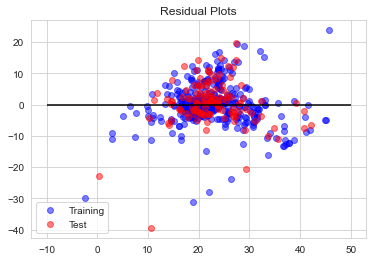

In [69]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5) # pred_train - Y_train = Residual

test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5) # pred_test - Y_test = Residual

plt.hlines(y=0,xmin=-10,xmax=50,colors='black')

plt.legend((train, test),('Training','Test'),loc='lower left')

plt.title('Residual Plots')

That's it for this lesson. Linear regression is a very broad topic, theres a ton of great information in the sci kit learn documentation, and I encourage you to check it out here: [http://scikit-learn.org/stable/modules/linear_model.html#linear-model](http://scikit-learn.org/stable/modules/linear_model.html#linear-model)